**$\underline{Elastic\hspace{0.2cm} Force\hspace{0.2cm} with\hspace{0.2cm} Verlet\hspace{0.2cm} Method}$**

Here we can see that the error of Euler's method doesn't exist, like Leap-frog and Velocity-Verlet (there is a code that compares these three methods).

Instead of deviding the second derivative into two of the first (like the Euler), this method focus directly on the second derivative.

Rewriting $a(x)$ as $\frac{d^2x}{dt^2} =\frac{\Delta^2x}{\Delta t'} =\frac{\Delta^2 x}{\Delta t} = \frac{x(t + \Delta t)+x(t-\Delta t)-2x(t)}{(\Delta t)^2} → x(t +\Delta t) = 2x(t) - x(t - \Delta t) +a(t)\Delta t^2$.

This is the **Verlet algorithm**: $x(t +\Delta t) = 2x(t) - x(t - \Delta t) +a(t)\Delta t^2$ 

Here we use the position $x$ at three different moments, with $t - \Delta t$ (in the past), $t$ (in the present) and the next $t + \Delta t$ (in the future).

We're goint to use the information from the previous two steps and take the variation of these two extremes steps (is the $dx$ of the derivative, considering $v = \frac{dx}{dt}$). $dt$ is multiplied by two because we use two $\Delta t$ ($(t - \Delta t)$ and $(t+\Delta t)$).

$v(t) = \frac{x(t+\Delta t)-x(t - \Delta t)}{2\Delta t}$

In the code: 

x = 2 * x - x(old) + a(x) * dt * 2 # this x = is the $x(t +\Delta t)$, 2x is $2x(t)$,-x(old) is $x(t-\Delta t)$




The fact that squared ($\Delta t^2$) requires more computational cost, to minimize this, we can create a variable that use these mathematical operation just one time. Like in this example:
```
dt2 = dt * dt
x0,v0 -> xold = x0;x = x0 + v0 * dt
for in range(np):
  xaux = x
  x = 2 * x - xold + a(x) * dt2
  v = (x - xold)/(2 * dt)
  xold = xaux
  print(t,xold,v(t))

```

At the beginning, we don't have the first information to use the Verlet algorithm, so we use Euler to discovered the first step (remembering that we use three steps ($t$)), the first step is the oldest ($t - \Delta t$), after that, with Verlet, we can calculate the next steps and then go on.

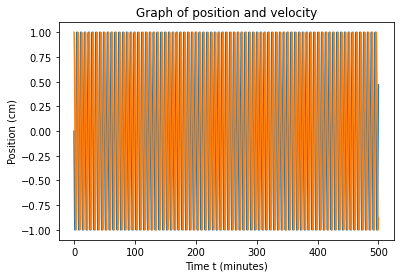

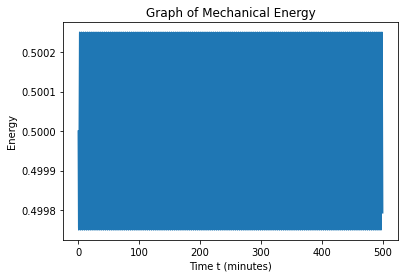

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# The situation is: an object pulled by a spring, the initial value is v = 0 (of the block) and x = 1. 

v = 0 # Initial velocity v0.
x1 = 1 # Initial position x0.
dt = 0.0005 # Step in which time passes.
m = 1 # Spring mass.
k = m # Spring constant.
w = k/m # = 1  Angular frequency.
t = 0 # Initial time, Time count.
tf = 500 # Final time.
E = (m * v**2)/2 + (k * x1**2)/2 # Mechanical energy = Kinetic energy + Potential energy (Elastic, in this case).

# List_s:
list_t = [t]
list_x = [x1]
list_v = [v]
list_e = [E]

def euler(x0,v,dt): # To find x2 with the information of x1 (initial condition) and v0 (another initial condition), we need to use Euler.
  x = x0 + v * dt # Euler's method: N(t + dt) = N(t) * N'(t) * dt -> this is the uniform linear motion equation to x..
  return x

x2 = euler(x1,v,dt) # Putting the value of euler function in x2.

def a(x): # Function of elastic acceleration.
  a = -(w**2) * x # a(x) = (-k * x2)/m = -(w**2 * x2); k/m = w^2
  return a 

while t < tf: 
  xaux = x2 # Auxiliary variable.
  x2 = 2 * x2 - x1 + a(x2) * dt**2 # x3 = 2 * x2 - x1 + a(x2) * dt**2 or x_next = 2 * x_present - x_old + a(x_present) * dt**2.
  list_x.append(x2)

  E = (m * v**2)/2 + (k * xaux**2)/2 # This is the present x (x2, not x3).
  list_e.append(E)

  v = (x2 - x1)/(2 * dt) # This method only does dx/dt, because the velocity is dx/dt.
  list_v.append(v)

  x1 = xaux # At the end of the loop, x1 now start to have the value of x2.
  
  t = t + dt 
  list_t.append(t)

plt.plot(list_t,list_v)
plt.plot(list_t,list_x)
plt.title('Graph of position and velocity')
#plt.legend(['Velocity','Position']) 
plt.xlabel('Time t (minutes)')
plt.ylabel('Position (cm)')
plt.show()

plt.plot(list_t,list_e)
plt.title('Graph of Mechanical Energy')
plt.xlabel('Time t (minutes)')
plt.ylabel('Energy')
plt.show()

'''
Due to the imprecision in the numerical method, the energy varies (energy must be constant), but this variation occurs between 0.5002
and 0.4998,very small variation.
'''

To see the energy graph better:

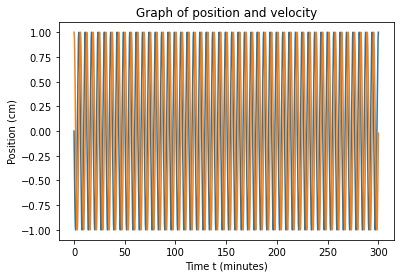

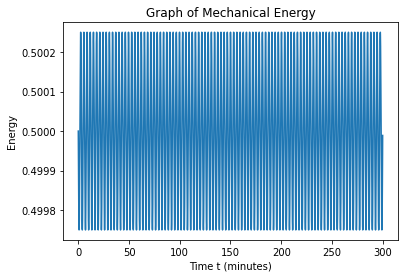

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# The situation is: an object pulled by a spring, the initial value is v = 0 (of the block) and x = 1. 

v = 0 # Initial velocity v0.
x1 = 1 # Initial position x0.
dt = 0.0005 # Step in which time passes.
m = 1 # Spring mass.
k = m # Spring constant.
w = k/m # = 1  Angular frequency.
t = 0 # Initial time, Time count.
tf = 300 # Final time.
E = (m * v**2)/2 + (k * x1**2)/2 # Mechanical energy = Kinetic energy + Potential energy (Elastic, in this case).

# List_s:
list_t = [t]
list_x = [x1]
list_v = [v]
list_e = [E]

def euler(x0,v,dt): # To find x2 with the information of x1 (initial condition) and v0 (another initial condition), we need to use Euler.
  x = x0 + v * dt # Euler's method: N(t + dt) = N(t) * N'(t) * dt -> this is the uniform linear motion equation to x..
  return x

x2 = euler(x1,v,dt) # Putting the value of euler function in x2.

def a(x): # Function of elastic acceleration.
  a = -(w**2) * x # a(x) = (-k * x2)/m = -(w**2 * x2); k/m = w^2
  return a 

while t < tf: 
  xaux = x2 # Auxiliary variable.
  x2 = 2 * x2 - x1 + a(x2) * dt**2 # x3 = 2 * x2 - x1 + a(x2) * dt**2 or x_next = 2 * x_present - x_old + a(x_present) * dt**2.
  list_x.append(x2)

  E = (m * v**2)/2 + (k * xaux**2)/2 # This is the present x (x2, not x3).
  list_e.append(E)

  v = (x2 - x1)/(2 * dt) # This method only does dx/dt, because the velocity is dx/dt.
  list_v.append(v)

  x1 = xaux # At the end of the loop, x1 now start to have the value of x2.
  
  t = t + dt 
  list_t.append(t)

plt.plot(list_t,list_v)
plt.plot(list_t,list_x)
plt.title('Graph of position and velocity')
#plt.legend(['Velocity','Position']) 
plt.xlabel('Time t (minutes)')
plt.ylabel('Position (cm)')
plt.show()

plt.plot(list_t,list_e)
plt.title('Graph of Mechanical Energy')
plt.xlabel('Time t (minutes)')
plt.ylabel('Energy')
plt.show()


# Due to the imprecision in the numerical method, the energy varies (energy must be constant), but this variation occurs between 0.5002
# and 0.4998,very small variation.


With less frequency:

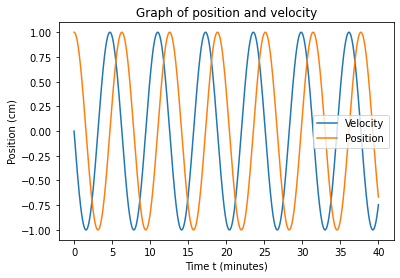

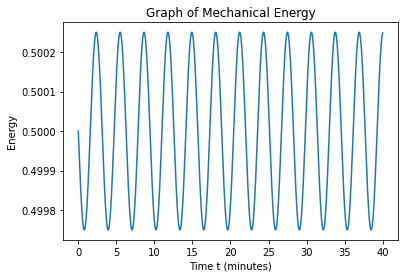

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# The situation is: an object pulled by a spring, the initial value is v = 0 (of the block) and x = 1. 

v = 0 # Initial velocity v0.
x1 = 1 # Initial position x0.
dt = 0.0005 # Step in which time passes.
m = 1 # Spring mass.
k = m # Spring constant.
w = k/m # = 1  Angular frequency.
t = 0 # Initial time, Time count.
tf = 40 # Final time.
E = (m * v**2)/2 + (k * x1**2)/2 # Mechanical energy = Kinetic energy + Potential energy (Elastic, in this case).

# List_s:
list_t = [t]
list_x = [x1]
list_v = [v]
list_e = [E]

def euler(x0,v,dt): # To find x2 with the information of x1 (initial condition) and v0 (another initial condition), we need to use Euler.
  x = x0 + v * dt # Euler's method: N(t + dt) = N(t) * N'(t) * dt -> this is the uniform linear motion equation to x..
  return x

x2 = euler(x1,v,dt) # Putting the value of euler function in x2.

def a(x): # Function of elastic acceleration.
  a = -(w**2) * x # a(x) = (-k * x2)/m = -(w**2 * x2); k/m = w^2
  return a 

while t < tf: 
  xaux = x2 # Auxiliary variable.
  x2 = 2 * x2 - x1 + a(x2) * dt**2 # x3 = 2 * x2 - x1 + a(x2) * dt**2 or x_next = 2 * x_present - x_old + a(x_present) * dt**2.
  list_x.append(x2)

  E = (m * v**2)/2 + (k * xaux**2)/2 # This is the present x (x2, not x3).
  list_e.append(E)

  v = (x2 - x1)/(2 * dt) # This method only does dx/dt, because the velocity is dx/dt.
  list_v.append(v)

  x1 = xaux # At the end of the loop, x1 now start to have the value of x2.
  
  t = t + dt 
  list_t.append(t)

plt.plot(list_t,list_v)
plt.plot(list_t,list_x)
plt.title('Graph of position and velocity')
plt.legend(['Velocity','Position']) 
plt.xlabel('Time t (minutes)')
plt.ylabel('Position (cm)')
plt.show()

plt.plot(list_t,list_e)
plt.title('Graph of Mechanical Energy')
plt.xlabel('Time t (minutes)')
plt.ylabel('Energy')
plt.show()


# Due to the imprecision in the numerical method, the energy varies (energy must be constant), but this variation occurs between 0.5002
# and 0.4998,very small variation.
